# Weather Forecasting


Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. People have attempted to predict the weather informally for millennia and formally since the 19th century. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere, land, and ocean and using meteorology to project how the atmosphere will change at a given place.

Once calculated manually based mainly upon changes in barometric pressure, current weather conditions, and sky condition or cloud cover, weather forecasting now relies on computer-based models that take many atmospheric factors into account.[1] Human input is still required to pick the best possible forecast model to base the forecast upon, which involves pattern recognition skills, teleconnections, knowledge of model performance, and knowledge of model biases. The inaccuracy of forecasting is due to the chaotic nature of the atmosphere, the massive computational power required to solve the equations that describe the atmosphere, the land, and the ocean, the error involved in measuring the initial conditions, and an incomplete understanding of atmospheric and related processes. Hence, forecasts become less accurate as the difference between current time and the time for which the forecast is being made (the range of the forecast) increases. The use of ensembles and model consensus help narrow the error and provide confidence level in the forecast.

There is a vast variety of end uses to weather forecasts. Weather warnings are important forecasts because they are used to protect life and property. Forecasts based on temperature and precipitation are important to agriculture, and therefore to traders within commodity markets. Temperature forecasts are used by utility companies to estimate demand over coming days. On an everyday basis, many use weather forecasts to determine what to wear on a given day. Since outdoor activities are severely curtailed by heavy rain, snow and wind chill, forecasts can be used to plan activities around these events, and to plan ahead and survive them.

# Loading the Dataset


In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_n=pd.read_csv('WeatherAus.csv')


In [3]:
df_n

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df_n.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Exploratory Data Analysis


In [5]:
df_n.shape


(8425, 23)

In [6]:
df_n.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df_n.tail()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [8]:
df_n.sample()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1605,2013-09-04,Newcastle,10.7,23.8,0.0,NaN,NaN,NaN,NaN,NaN,...,68.0,56.0,NaN,NaN,1.0,0.0,17.5,22.7,No,No


In [9]:
df_n.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [10]:
df=df_n.drop(['Date','Location','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm',
           'WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Cloud9am','Temp9am'
          ,'RainToday'],axis=1)

In [11]:
df


,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm,RainTomorrow
0,13.4,22.9,NaN,NaN,22.0,NaN,21.8,No
1,7.4,25.1,NaN,NaN,25.0,NaN,24.3,No
2,12.9,25.7,NaN,NaN,30.0,2.0,23.2,No
3,9.2,28.0,NaN,NaN,16.0,NaN,26.5,No
4,17.5,32.3,NaN,NaN,33.0,8.0,29.7,No
...,...,...,...,...,...,...,...,...
8420,2.8,23.4,NaN,NaN,24.0,NaN,22.4,No
8421,3.6,25.3,NaN,NaN,21.0,NaN,24.5,No
8422,5.4,26.9,NaN,NaN,24.0,NaN,26.1,No
8423,7.8,27.0,NaN,NaN,24.0,2.0,26.0,No


In [12]:
df.describe()


,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
count,8350.000000,8365.000000,4913.000000,4431.000000,8323.000000,5970.000000,8329.000000
mean,13.193305,23.859976,5.389395,7.632205,51.249790,4.503183,22.442934
std,5.403596,6.136408,5.044484,3.896235,18.423774,2.731659,5.980020
min,-2.000000,8.200000,0.000000,0.000000,6.000000,0.000000,7.300000
25%,9.200000,19.300000,2.600000,4.750000,39.000000,2.000000,18.000000
50%,13.300000,23.300000,4.600000,8.700000,51.000000,5.000000,21.900000
75%,17.400000,28.000000,7.000000,10.700000,63.000000,7.000000,26.400000
max,28.500000,45.500000,145.000000,13.900000,99.000000,8.000000,44.100000


In [13]:
df['RainTomorrow'].value_counts()


No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

# Checking Null Values



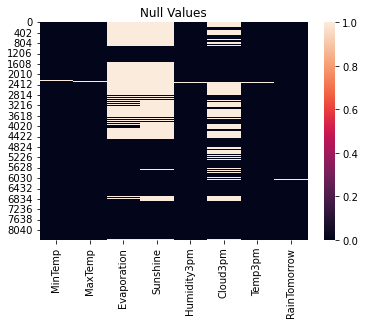

In [14]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [15]:
df.isnull().sum().sum()


10533

Therefore There are null values in the dataset.We shall remove the null values using the following techniques



In [16]:
df.dropna(inplace=True)


In [17]:
df.isnull().sum().sum()


0

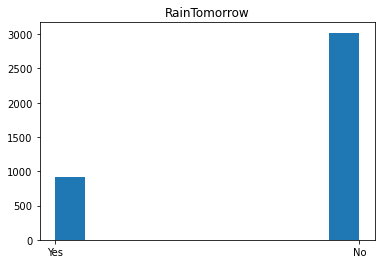

In [18]:
df['RainTomorrow'].hist(grid=False)
plt.title('RainTomorrow')
plt.show()

In [19]:
df['RainTomorrow'].value_counts()


No     3021
Yes     921
Name: RainTomorrow, dtype: int64

# Label Encoder



In [20]:
from sklearn.preprocessing import  LabelEncoder


In [21]:
le=LabelEncoder()
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])

In [22]:
le.inverse_transform([1,0])


array(['Yes', 'No'], dtype=object)

In [23]:
df['RainTomorrow'].value_counts()


0    3021
1     921
Name: RainTomorrow, dtype: int64

Therefore object datatype is converted into categorical (INTEGER) datatype for further operations



In [24]:
df.corr()


,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm,RainTomorrow
MinTemp,1.000000,0.737507,0.497595,0.073721,0.053815,0.051234,0.709369,0.068591
MaxTemp,0.737507,1.000000,0.597566,0.517222,-0.420550,-0.304188,0.976599,-0.189499
Evaporation,0.497595,0.597566,1.000000,0.349778,-0.314454,-0.188376,0.582955,-0.106155
Sunshine,0.073721,0.517222,0.349778,1.000000,-0.627181,-0.723712,0.542085,-0.480887
Humidity3pm,0.053815,-0.420550,-0.314454,-0.627181,1.000000,0.506716,-0.497081,0.489199
Cloud3pm,0.051234,-0.304188,-0.188376,-0.723712,0.506716,1.000000,-0.354987,0.427189
Temp3pm,0.709369,0.976599,0.582955,0.542085,-0.497081,-0.354987,1.000000,-0.237371
RainTomorrow,0.068591,-0.189499,-0.106155,-0.480887,0.489199,0.427189,-0.237371,1.000000


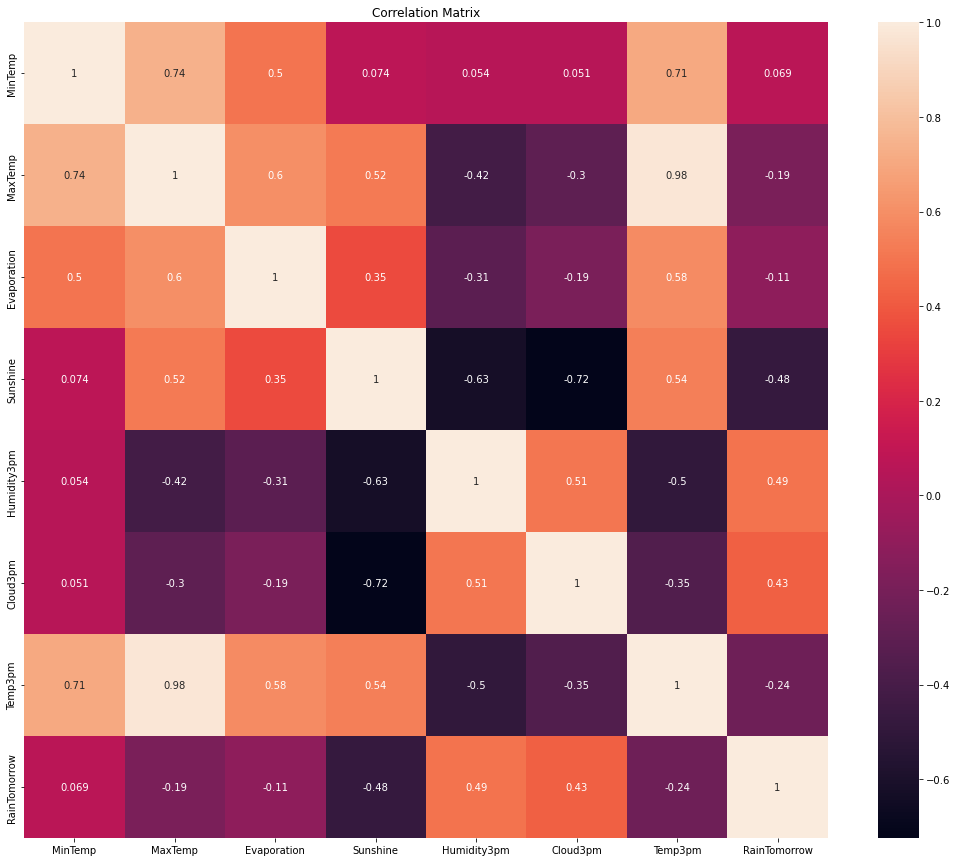

In [26]:
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[18,15])
# Plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Rainfall correlation_matrix.jpg')
plt.show()

Relation with more columns  so finding  correlation with other method


In [27]:
corr_matrix=df.corr()
corr_matrix

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm,RainTomorrow
MinTemp,1.000000,0.737507,0.497595,0.073721,0.053815,0.051234,0.709369,0.068591
MaxTemp,0.737507,1.000000,0.597566,0.517222,-0.420550,-0.304188,0.976599,-0.189499
Evaporation,0.497595,0.597566,1.000000,0.349778,-0.314454,-0.188376,0.582955,-0.106155
Sunshine,0.073721,0.517222,0.349778,1.000000,-0.627181,-0.723712,0.542085,-0.480887
Humidity3pm,0.053815,-0.420550,-0.314454,-0.627181,1.000000,0.506716,-0.497081,0.489199
Cloud3pm,0.051234,-0.304188,-0.188376,-0.723712,0.506716,1.000000,-0.354987,0.427189
Temp3pm,0.709369,0.976599,0.582955,0.542085,-0.497081,-0.354987,1.000000,-0.237371
RainTomorrow,0.068591,-0.189499,-0.106155,-0.480887,0.489199,0.427189,-0.237371,1.000000


In [28]:
type(corr_matrix)


pandas.core.frame.DataFrame

In [29]:
corr_matrix=df.corr()
corr_matrix['RainTomorrow'].sort_values(ascending=False)

RainTomorrow    1.000000
Humidity3pm     0.489199
Cloud3pm        0.427189
MinTemp         0.068591
Evaporation    -0.106155
MaxTemp        -0.189499
Temp3pm        -0.237371
Sunshine       -0.480887
Name: RainTomorrow, dtype: float64

There is a strong positive correlation between Humidity3pm and RainTomorrow also there is weak positive correaltion between the Mintemp and RainTomorrow. There is a strong negative correlation between Evaporation and RainTomorrow also there is a weak negative correlation between Sunshine and RainTomorrow

# Let's check the data distribution among all the columns



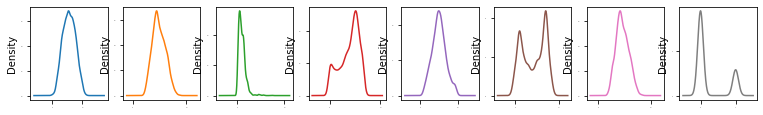

In [30]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

We can see skewness in columns.Lets handle skewness in further steps

Splitting the Independent and Target variables in x and y before removing the skewness

In [31]:
x=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

In [32]:
x

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
907,19.8,27.1,8.6,9.0,60.0,6.0,26.0
908,18.7,25.6,3.8,3.4,90.0,7.0,20.9
909,16.5,25.5,2.8,6.1,65.0,7.0,24.5
910,18.5,26.9,3.2,11.0,60.0,5.0,26.4
911,18.2,28.2,6.8,9.0,68.0,1.0,25.9
...,...,...,...,...,...,...,...
8381,25.2,34.5,4.0,9.2,46.0,7.0,33.4
8382,26.2,33.3,6.0,5.9,93.0,8.0,25.2
8383,24.9,32.8,6.2,8.7,55.0,6.0,32.0
8384,25.5,33.1,4.8,7.1,58.0,7.0,31.5


In [33]:
y


907     1
908     1
909     0
910     0
911     1
       ..
8381    0
8382    1
8383    0
8384    0
8385    0
Name: RainTomorrow, Length: 3942, dtype: int32

In [34]:
# Checking  the skewness
x.skew().sort_values(ascending=False)

Evaporation    2.106943
Temp3pm        0.252833
MaxTemp        0.251113
Humidity3pm    0.188305
MinTemp        0.030742
Cloud3pm      -0.149415
Sunshine      -0.587638
dtype: float64

We can see skewness in many columns will remove skewness using Power transform methods



In [35]:
from sklearn.preprocessing import power_transform 


In [36]:
x_new=power_transform(x)


In [37]:
# Checking skewness
pd.DataFrame(x_new).skew().sort_values(ascending=False)

2    0.000606
6   -0.020068
1   -0.020337
4   -0.025227
0   -0.070152
5   -0.257103
3   -0.401753
dtype: float64

In [38]:
type(x_new)


numpy.ndarray

In [39]:
x.columns


Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'Humidity3pm',
       'Cloud3pm', 'Temp3pm'],
      dtype='object')

In [40]:
x=pd.DataFrame(x_new,columns=x.columns)


In [41]:
x


,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
0,1.110607,0.454073,1.052568,0.264864,0.602861,0.694290,0.528344
1,0.907945,0.215410,-0.228903,-1.190045,2.144050,1.028530,-0.327285
2,0.498292,0.199253,-0.641813,-0.525015,0.869056,1.028530,0.285454
3,0.870948,0.422641,-0.466058,0.845611,0.602861,0.348617,0.592009
4,0.815364,0.624905,0.659641,0.264864,1.026756,-1.221027,0.512357
...,...,...,...,...,...,...,...
3937,2.087563,1.544493,-0.155788,0.321720,-0.168453,1.028530,1.641296
3938,2.265581,1.376319,0.457968,-0.576865,2.291774,1.353086,0.399636
3939,2.033994,1.305344,0.510266,0.180116,0.332097,0.694290,1.440332
3940,2.141055,1.347994,0.112484,-0.260386,0.495129,1.028530,1.367566


In [42]:
x.skew().sort_values(ascending=False)


Evaporation    0.000606
Temp3pm       -0.020068
MaxTemp       -0.020337
Humidity3pm   -0.025227
MinTemp       -0.070152
Cloud3pm      -0.257103
Sunshine      -0.401753
dtype: float64

In [43]:
sk=x.skew()


In [44]:
sk


MinTemp       -0.070152
MaxTemp       -0.020337
Evaporation    0.000606
Sunshine      -0.401753
Humidity3pm   -0.025227
Cloud3pm      -0.257103
Temp3pm       -0.020068
dtype: float64

In [45]:
sk[np.abs(sk)>0.5].all()


True

In [46]:
sk[np.abs(sk)>0.5]


Series([], dtype: float64)

In [47]:
x.skew()[np.abs(x.skew())<0.25].all()


True

Skewness has been removed now we can proceed with further steps



# Checking Outliers


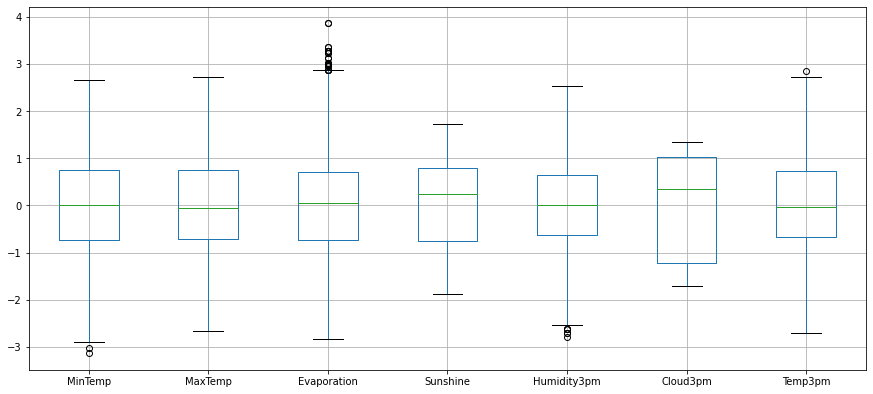

In [48]:
# Plotting Boxplot for the available columns
x.iloc[:,0:8].boxplot(figsize=[15,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [49]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

MinTemp        False
MaxTemp         True
Evaporation    False
Sunshine        True
Humidity3pm     True
Cloud3pm        True
Temp3pm         True
dtype: bool

Therefore Evaporation Min temparature are contains outliers



# Remove Outliers


In [50]:
features=['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'Humidity3pm',
       'Cloud3pm', 'Temp3pm']

In [51]:
# Define a functions called outliers which returns a list of index of outliers
# IQR = q3-q1
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    ls=df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    return ls

In [52]:
# creating the empty list to store the output variable from multiple columns
index_list=[]
for i in features:
    index_list.extend(outliers(df,i))

In [53]:
index_list


[4618,
 5429,
 7983,
 7984,
 2827,
 2835,
 2841,
 2849,
 2855,
 2863,
 2869,
 2877,
 2891,
 2897,
 2905,
 2911,
 2919,
 2925,
 2933,
 2939,
 2947,
 2953,
 2961,
 2967,
 2975,
 2989,
 3009,
 3679,
 3687,
 3693,
 3701,
 3707,
 3715,
 3721,
 3729,
 3743,
 3749,
 3757,
 3763,
 3771,
 3777,
 3785,
 3791,
 3799,
 3805,
 3813,
 3819,
 3827,
 3841,
 3861,
 4565,
 4566,
 4593,
 4600,
 4607,
 4608,
 4619,
 4638,
 4658,
 4659,
 5310,
 5324,
 5376,
 5377,
 5404,
 5411,
 5418,
 5419,
 5430,
 5449,
 5469,
 5470,
 6121,
 6135,
 6932,
 6960,
 6961,
 6975,
 6977,
 7002,
 7304,
 7325,
 7326,
 7954,
 7957,
 7984,
 7993,
 8024,
 1150,
 1202,
 3002,
 3854,
 4672,
 5483,
 6488,
 6491,
 6546,
 6583,
 6643,
 6658,
 7114,
 7275,
 4618,
 4972,
 5429,
 5783,
 7326,
 7328,
 7371,
 7983]

In [54]:
# define a function called remove which returns a cleaned dataframe without outliers
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [55]:
df_cleaned=remove(df,index_list)


In [56]:
df_cleaned.shape


(3837, 8)

In [57]:
df_cleaned


,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm,RainTomorrow
907,19.8,27.1,8.6,9.0,60.0,6.0,26.0,1
908,18.7,25.6,3.8,3.4,90.0,7.0,20.9,1
909,16.5,25.5,2.8,6.1,65.0,7.0,24.5,0
910,18.5,26.9,3.2,11.0,60.0,5.0,26.4,0
911,18.2,28.2,6.8,9.0,68.0,1.0,25.9,1
...,...,...,...,...,...,...,...,...
8381,25.2,34.5,4.0,9.2,46.0,7.0,33.4,0
8382,26.2,33.3,6.0,5.9,93.0,8.0,25.2,1
8383,24.9,32.8,6.2,8.7,55.0,6.0,32.0,0
8384,25.5,33.1,4.8,7.1,58.0,7.0,31.5,0


# Splitting independent and dependent variables in x and y before removing the skewness

In [58]:
x=df_cleaned.drop('RainTomorrow',axis=1)
y=df_cleaned['RainTomorrow']

In [59]:
x


,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
907,19.8,27.1,8.6,9.0,60.0,6.0,26.0
908,18.7,25.6,3.8,3.4,90.0,7.0,20.9
909,16.5,25.5,2.8,6.1,65.0,7.0,24.5
910,18.5,26.9,3.2,11.0,60.0,5.0,26.4
911,18.2,28.2,6.8,9.0,68.0,1.0,25.9
...,...,...,...,...,...,...,...
8381,25.2,34.5,4.0,9.2,46.0,7.0,33.4
8382,26.2,33.3,6.0,5.9,93.0,8.0,25.2
8383,24.9,32.8,6.2,8.7,55.0,6.0,32.0
8384,25.5,33.1,4.8,7.1,58.0,7.0,31.5


In [60]:
y


907     1
908     1
909     0
910     0
911     1
       ..
8381    0
8382    1
8383    0
8384    0
8385    0
Name: RainTomorrow, Length: 3837, dtype: int32

In [61]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

MinTemp         True
MaxTemp         True
Evaporation    False
Sunshine        True
Humidity3pm     True
Cloud3pm        True
Temp3pm         True
dtype: bool

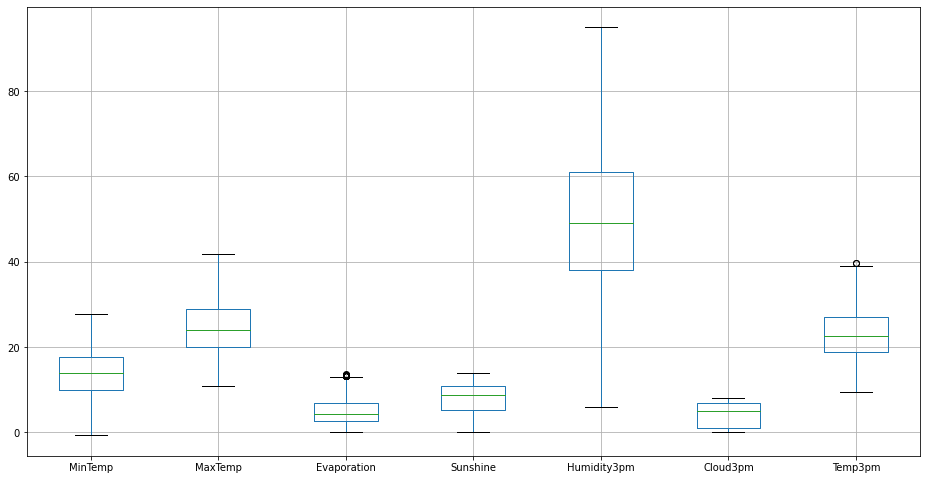

In [63]:
# Plotting the boxplot for the columns
x.iloc[:,0:8].boxplot(figsize=[16,8])
plt.subplots_adjust(bottom=0.1)
plt.show()

Therefore we have removed most of the outliers and there is no problem in working with this outliers



# Remove skewness

In [64]:
from sklearn.preprocessing import power_transform


In [65]:
x_new=power_transform(x)


In [66]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)


1   -0.023473
6   -0.023724
4   -0.026039
2   -0.037517
0   -0.065810
5   -0.258136
3   -0.398652
dtype: float64

In [67]:
type(x_new)


numpy.ndarray

In [68]:
x.columns


Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'Humidity3pm',
       'Cloud3pm', 'Temp3pm'],
      dtype='object')

In [69]:
x=pd.DataFrame(x_new,columns=x.columns)


In [70]:
x


,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
0,1.135548,0.479790,1.228834,0.266648,0.609999,0.699118,0.554067
1,0.934039,0.237471,-0.246793,-1.195289,2.186547,1.035105,-0.313893
2,0.525961,0.221085,-0.671762,-0.527933,0.881819,1.035105,0.306821
3,0.897227,0.447846,-0.493765,0.851758,0.609999,0.351848,0.618982
4,0.841905,0.653555,0.750317,0.266648,1.042953,-1.221418,0.537773
...,...,...,...,...,...,...,...
3832,2.103870,1.593270,-0.169059,0.323901,-0.176258,1.035105,1.695050
3833,2.279817,1.420883,0.513820,-0.580028,2.337983,1.361527,0.422969
3834,2.050896,1.348201,0.574564,0.181320,0.333750,0.699118,1.488083
3835,2.156755,1.391872,0.122697,-0.261917,0.500056,1.035105,1.413243


In [71]:
x.skew().sort_values(ascending=False)


MaxTemp       -0.023473
Temp3pm       -0.023724
Humidity3pm   -0.026039
Evaporation   -0.037517
MinTemp       -0.065810
Cloud3pm      -0.258136
Sunshine      -0.398652
dtype: float64

In [72]:
sk=x.skew()


In [73]:
sk


MinTemp       -0.065810
MaxTemp       -0.023473
Evaporation   -0.037517
Sunshine      -0.398652
Humidity3pm   -0.026039
Cloud3pm      -0.258136
Temp3pm       -0.023724
dtype: float64

In [74]:
sk[np.abs(sk)>0.5].all()


True

In [75]:
sk[np.abs(sk)>0.5]


Series([], dtype: float64)

In [76]:
x.skew()[np.abs(x.skew())<0.25].all()


True

skewness has been removed



# Training Process Begin


Finding The Best Random State



In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [80]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('accuracy',acc,'random state',i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('accuracy',maxaccu,'random state',i)

accuracy 0.84765625 random state 1
accuracy 0.84765625 random state 1
accuracy 0.8294270833333334 random state 2
accuracy 0.8502604166666666 random state 3
accuracy 0.8502604166666666 random state 3
accuracy 0.83203125 random state 4
accuracy 0.8177083333333334 random state 5
accuracy 0.8111979166666666 random state 6
accuracy 0.8424479166666666 random state 7
accuracy 0.8385416666666666 random state 8
accuracy 0.84375 random state 9
accuracy 0.84765625 random state 10
accuracy 0.8229166666666666 random state 11
accuracy 0.83203125 random state 12
accuracy 0.8268229166666666 random state 13
accuracy 0.84375 random state 14
accuracy 0.85546875 random state 15
accuracy 0.85546875 random state 15
accuracy 0.82421875 random state 16
accuracy 0.82421875 random state 17
accuracy 0.8059895833333334 random state 18
accuracy 0.8138020833333334 random state 19
accuracy 0.81640625 random state 20
accuracy 0.8268229166666666 random state 21
accuracy 0.83203125 random state 22
accuracy 0.8151041666

In [81]:
print('Best Accuracy is',maxaccu,'random state',maxrs)


Best Accuracy is 0.8645833333333334 random state 26


We have found best random state as 26. We will create our train_test_split using this random_state

# Creating Train Test Split



In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=26)


In [84]:
x_train


,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
3379,-0.255721,1.391872,1.561119,1.493803,-2.275680,-1.710754,1.606808
1450,-0.062193,-0.045253,-0.326712,-0.125631,-0.061373,-1.221418,0.121458
3419,-0.062193,0.653555,1.781584,1.369480,-1.650420,-1.710754,0.731597
1141,-0.023726,-0.712982,0.052401,-0.070536,0.555118,0.699118,-0.752713
2848,-0.042950,1.052157,0.451912,0.851758,-1.198104,-1.221418,1.185658
...,...,...,...,...,...,...,...
1985,-0.930838,-0.731304,-0.169059,0.585072,-1.261327,-1.710754,-0.530532
1456,0.878800,0.188224,0.806897,-1.795005,-0.766310,1.035105,0.273382
1798,-1.364351,-1.481984,-0.671762,-0.015117,-0.826936,-0.387169,-1.396644
1342,0.488504,1.274998,1.908048,-0.422612,-1.261327,1.035105,1.000116


In [85]:
x_test


,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
2809,0.730880,0.885508,1.228834,1.215389,0.165678,0.699118,0.827156
696,0.563355,0.622199,0.862544,1.307667,0.052591,-1.221418,0.763548
3289,-0.749259,-0.992372,-1.294966,0.153027,-0.118698,-0.387169,-0.980934
2340,0.934039,-0.215914,-1.416595,-1.741160,2.438411,1.361527,-0.242836
2676,-0.412061,-0.354933,0.574564,-0.884145,-0.586324,0.699118,-0.207515
...,...,...,...,...,...,...,...
2595,-0.709211,-2.184622,-0.246793,-1.878468,2.135850,1.361527,-2.056075
2891,-0.197448,-0.372472,-1.827772,-0.809533,-0.292110,1.035105,-0.278294
1965,-1.197431,-0.712982,0.191399,0.295238,-0.467816,-1.710754,-0.567165
1030,-0.951157,-1.899086,-0.493765,-1.846130,0.333750,1.361527,-1.858217


In [86]:
y_train


7920    0
5508    0
7962    0
5034    0
7388    0
       ..
6289    0
5514    1
6003    0
5390    0
4632    0
Name: RainTomorrow, Length: 3069, dtype: int32

In [87]:
y_test


7348    0
3787    0
7830    0
6659    1
7208    0
       ..
7127    1
7431    0
6269    0
4850    1
1087    0
Name: RainTomorrow, Length: 768, dtype: int32

# Model Evaluation


Logistic Regression


In [89]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 86.45833333333334
[[564  32]
 [ 72 100]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       596
           1       0.76      0.58      0.66       172

    accuracy                           0.86       768
   macro avg       0.82      0.76      0.79       768
weighted avg       0.86      0.86      0.86       768



# Decision Tree Classifier model


In [91]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred))

Accuracy 83.46354166666666
[[534  62]
 [ 65 107]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       596
           1       0.76      0.58      0.66       172

    accuracy                           0.86       768
   macro avg       0.82      0.76      0.79       768
weighted avg       0.86      0.86      0.86       768



Random Forest Classifier


In [93]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred3=rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

Accuracy 89.0625
[[570  26]
 [ 58 114]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       596
           1       0.81      0.66      0.73       172

    accuracy                           0.89       768
   macro avg       0.86      0.81      0.83       768
weighted avg       0.89      0.89      0.89       768



# Support Vector Classifier


In [95]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred4=svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred4)*100)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

Accuracy 86.71875
[[577  19]
 [ 83  89]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       596
           1       0.82      0.52      0.64       172

    accuracy                           0.87       768
   macro avg       0.85      0.74      0.78       768
weighted avg       0.86      0.87      0.86       768



# AdaBoostClassifier


In [96]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred5=ad.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred5)*100)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

Accuracy 85.41666666666666
[[560  36]
 [ 76  96]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       596
           1       0.73      0.56      0.63       172

    accuracy                           0.85       768
   macro avg       0.80      0.75      0.77       768
weighted avg       0.85      0.85      0.85       768



# Gradient Boosting Classifier


In [97]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred6=gb.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred6)*100)
print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

Accuracy 86.328125
[[561  35]
 [ 70 102]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       596
           1       0.74      0.59      0.66       172

    accuracy                           0.86       768
   macro avg       0.82      0.77      0.79       768
weighted avg       0.86      0.86      0.86       768



Random Forest Classifier model perform well with an accuracy of 89% and after that Support vector is perfoming well with an accuracy of 87%, Logistic regression,Gradient Boosting performs well with an accuracy of 86.45%.

# Cross Validation


In [98]:
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(lr,x,y,cv=5)
print('Cross Validation Score of Logistic Regression model:',scr1.mean())

Cross Validation Score of Logistic Regression model: 0.8178404090612776


In [99]:
scr2=cross_val_score(dt,x,y,cv=5)
print('Cross validation score of Decision Tree model:',scr2.mean())

Cross validation score of Decision Tree model: 0.8126195132551064


In [100]:
scr3=cross_val_score(rf,x,y,cv=5)
print('Cross validation score of Random Forest model:',scr3.mean())


Cross validation score of Random Forest model: 0.8665610739895697


In [101]:
scr4=cross_val_score(svc,x,y,cv=5)
print('Cross validation score of Support vector model:',scr4.mean())

Cross validation score of Support vector model: 0.8212210723598435


In [102]:
scr5=cross_val_score(ad,x,y,cv=5)
print('Cross validation score of AdaBoost model:',scr5.mean())

Cross validation score of AdaBoost model: 0.8131471371142981


In [103]:

scr6=cross_val_score(gb,x,y,cv=5)
print('Cross validation score of Gradient Boost model:',scr6.mean())

Cross validation score of Gradient Boost model: 0.8191411342894395


cross validation score of Random Forest model is providing highest score of 85.87


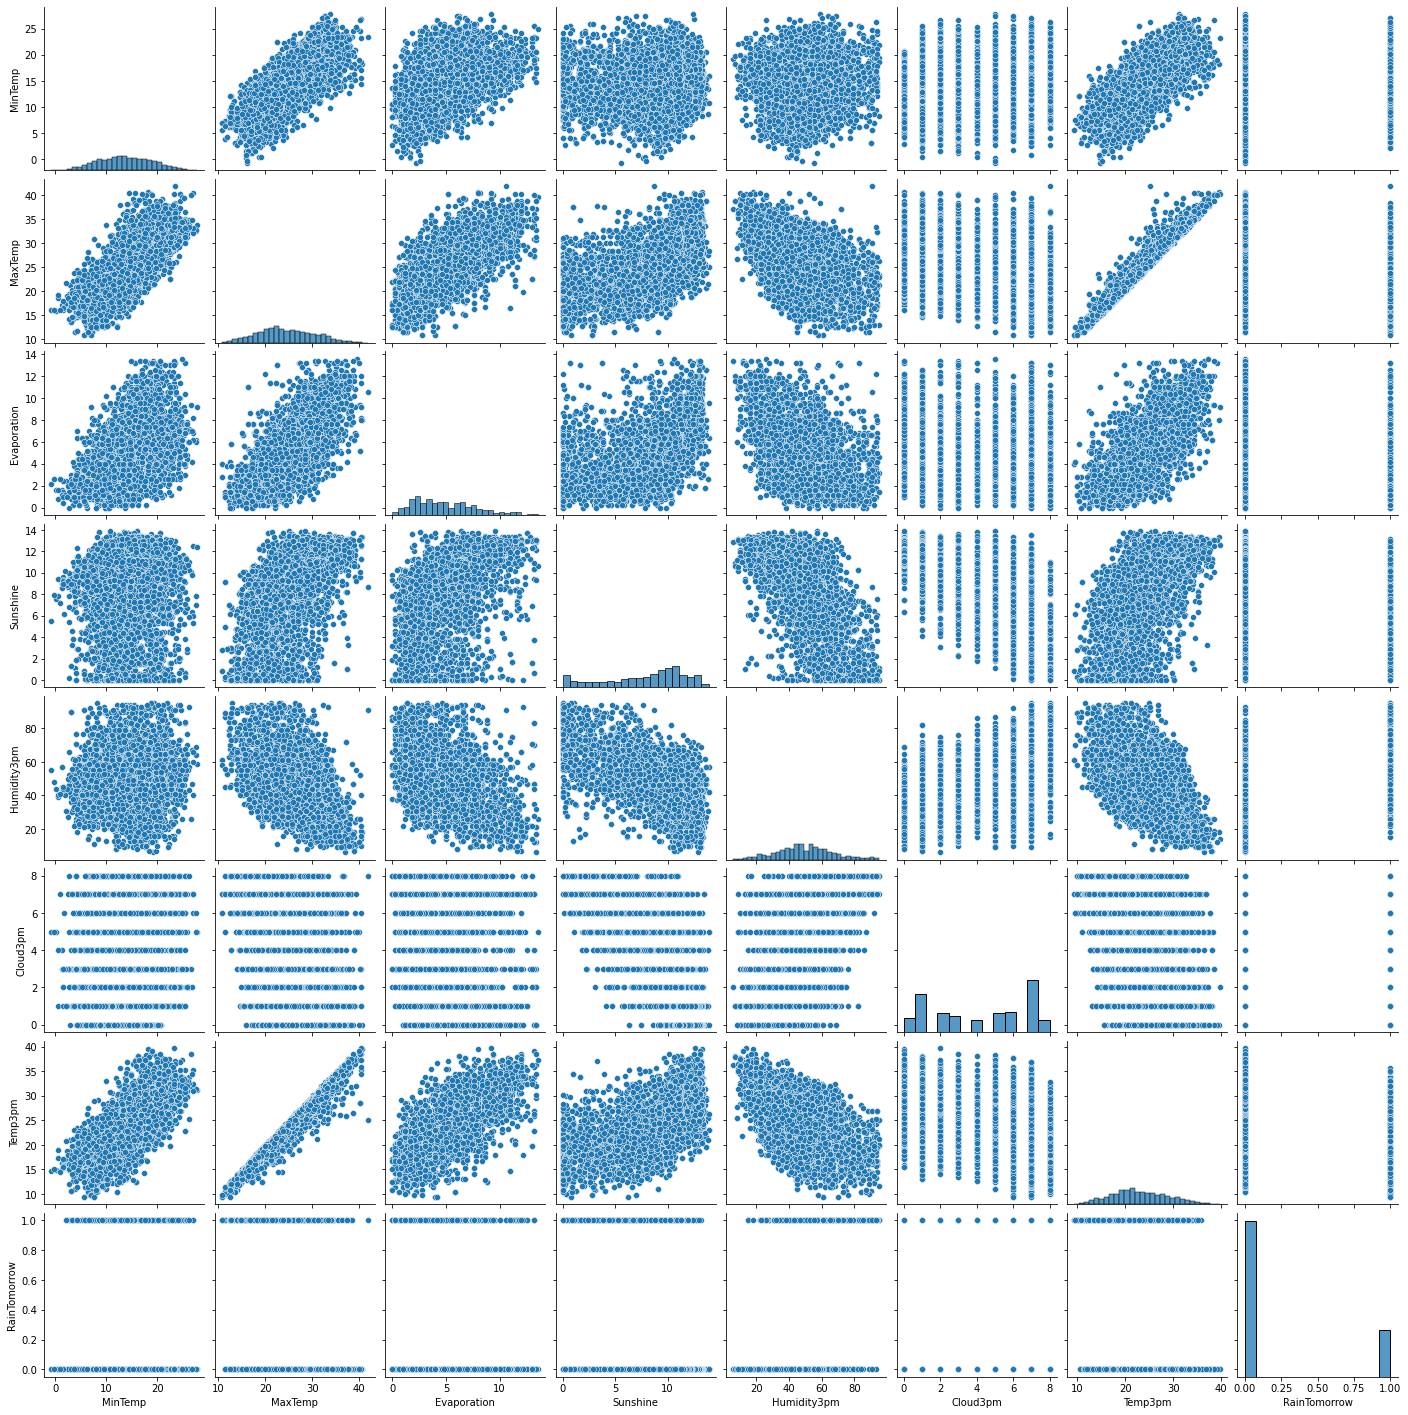

In [105]:
sns.pairplot(df_cleaned)

# Training Process Begin


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

Creating train_test_split



In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)


In [108]:
x_train


,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
921,-0.139361,-0.285139,-0.581284,-0.369402,-0.118698,0.699118,-0.278294
223,0.356901,0.302719,0.191399,0.352637,1.413705,0.699118,0.121458
613,0.582030,-0.113114,-0.493765,-1.878468,2.135850,1.361527,-0.603954
1919,0.356901,0.253827,-0.169059,-0.315835,2.085043,1.035105,-0.828089
1496,-1.512437,-1.011358,-1.681762,-0.449081,0.333750,0.699118,-0.961671
...,...,...,...,...,...,...,...
2763,1.731129,1.971168,2.070584,0.266648,-1.518722,1.035105,1.782625
905,1.317392,0.367503,1.076520,-1.665725,0.719235,1.035105,0.001602
1096,0.656574,0.495720,-1.069219,-0.580028,1.726152,1.035105,-0.678008
235,0.129384,0.105542,0.574564,1.338544,0.389376,-1.221418,0.256619


In [109]:
x_test


,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
1907,1.731129,1.593270,-0.581284,0.124810,-0.586324,-0.787940,1.768075
2811,1.153789,1.507433,1.278195,1.215389,-1.453657,-1.221418,1.680390
993,-2.174920,-2.029338,-1.545165,-1.646280,2.186547,1.035105,-2.376043
1687,-0.081455,0.684808,0.052401,1.338544,0.277927,-0.387169,0.356767
2610,-0.471058,-0.676462,-2.343955,-1.148797,0.165678,-0.009086,-0.585540
...,...,...,...,...,...,...,...
2798,0.319153,0.870217,1.326891,1.400475,-1.518722,0.351848,1.093285
1885,1.516022,0.684808,1.694921,0.295238,0.333750,1.035105,0.554067
1163,-0.569857,-1.145593,-1.069219,-1.148797,0.827789,1.035105,-1.058446
1131,0.186498,0.854901,0.052401,-1.646280,0.165678,1.035105,0.874609


In [110]:
y_train


4736    0
1136    1
2886    1
6222    1
5554    0
       ..
7298    0
4720    1
4943    1
1153    0
4892    1
Name: RainTomorrow, Length: 3069, dtype: int32

In [111]:
y_test


6210    0
7350    0
4808    1
5803    0
7142    0
       ..
7337    0
6182    0
5066    0
5013    1
5455    0
Name: RainTomorrow, Length: 768, dtype: int32

In [112]:
x_train.shape


(3069, 7)

In [113]:
x_test.shape


(768, 7)

In [114]:
y_train.shape


(3069,)

In [115]:
y_test.shape


(768,)

In [116]:
lr=LinearRegression()


In [117]:
lr.fit(x_train,y_train)


LinearRegression()

In [118]:
coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
MinTemp,-0.038992
MaxTemp,0.187767
Evaporation,0.041250
Sunshine,-0.132169
Humidity3pm,0.130344
Cloud3pm,0.038103
Temp3pm,-0.131049


In [119]:
lr.intercept_


0.23121707296893168

To make predictions on test data



In [120]:
y_pred=lr.predict(x_test)


In [121]:
com_df=pd.DataFrame({'Actual Rainfall':y_test,'Predicted Rainfall':y_pred})
com_df

,Actual Rainfall,Predicted Rainfall
6210,0,0.084256
7350,0,-0.094864
4808,1,0.724648
5803,0,0.162944
7142,0,0.275697
...,...,...
7337,0,-0.076018
6182,0,0.341916
5066,0,0.432108
5013,1,0.550636


In [122]:
pd.set_option('display.max_rows',None)


In [123]:
com_df


,Actual Rainfall,Predicted Rainfall
6210,0,0.084256
7350,0,-0.094864
4808,1,0.724648
5803,0,0.162944
7142,0,0.275697
8202,0,0.149915
5583,0,0.312891
924,1,0.748453
5560,0,0.087629
8199,0,0.444629


In [124]:
com_df.shape


(768, 2)

In [125]:
print('error:')
print('Mean Absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',mean_squared_error(y_test,y_pred))
print('Root Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean Absolute error: 0.2797537449381117
Mean Squared error: 0.1263122752034702
Root Squared error: 0.3554043826452766


In [126]:
df.describe()


,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm,RainTomorrow
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000
mean,13.988864,24.657407,5.238331,7.815550,49.674531,4.213090,23.141679,0.233638
std,5.190282,6.047037,3.630105,3.832908,17.742122,2.652361,5.897259,0.423198
min,-0.700000,10.800000,0.000000,0.000000,6.000000,0.000000,9.400000,0.000000
25%,10.100000,20.200000,2.600000,5.200000,38.000000,1.000000,19.000000,0.000000
50%,13.900000,23.950000,4.600000,8.900000,49.000000,5.000000,22.600000,0.000000
75%,17.900000,29.000000,7.000000,10.800000,61.000000,7.000000,27.300000,0.000000
max,28.500000,43.600000,37.000000,13.900000,98.000000,8.000000,42.400000,1.000000


# Random Forest Regressor


In [127]:
from sklearn.ensemble import RandomForestRegressor


In [128]:
rf=RandomForestRegressor()


In [129]:
rf.fit(x_train,y_train)


RandomForestRegressor()

In [130]:
y_pred=rf.predict(x_test)


In [131]:
com_df=pd.DataFrame({'Actual Rainfall':y_test,'Predicted Rainfall':y_pred})
com_df

,Actual Rainfall,Predicted Rainfall
6210,0,0.29
7350,0,0.00
4808,1,0.95
5803,0,0.05
7142,0,0.49
8202,0,0.38
5583,0,0.16
924,1,1.00
5560,0,0.02
8199,0,0.57


In [132]:
print('error:')
print('Mean Absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',mean_squared_error(y_test,y_pred))
print('Root Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean Absolute error: 0.191640625
Mean Squared error: 0.08930286458333332
Root Squared error: 0.29883584889255393


# Decision Tree Regressor


In [133]:

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=1)

In [134]:
dt.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=1)

In [135]:
y_pred3=dt.predict(x_test)


In [136]:
print('error:')
print('Mean Absolute error:',mean_absolute_error(y_test,y_pred3))
print('Mean Squared error:',mean_squared_error(y_test,y_pred3))
print('Root Squared error:',np.sqrt(mean_squared_error(y_test,y_pred3)))

error:
Mean Absolute error: 0.2531104162887811
Mean Squared error: 0.12435802645887428
Root Squared error: 0.35264433422199526


Amomg these models RandomForest has lowest Root mean square value. Therefore lower the root mean square higher will be the accuracy of the predicted model



# Saving The Model


In [138]:
#save the best model
import joblib
from joblib import dump
joblib.dump(rf,'Weather_Forecast.pkl')

['Weather_Forecast.pkl']